In [6]:
# Bagian 1: Import Libraries dan Definisikan Data

import numpy as np
import pandas as pd

# Data
data = {
    'No. Serbuk': ['MA-03138/2019', 'MA-03291/2019', 'BJ-01594/2019', 'BJ-01625/2019', 'MA-03290/2019',
                   'MA-03248/2019', 'MA-03249/2019', 'MA-03220/2019', 'BJ-01621/2019', 'BJ-01604/2019',
                   'MA-03195/2019', 'MA-03247/2019', 'BJ-01639/2019', 'MA-03271/2019', 'MA-03321/2019',
                   'BJ-01650/2019', 'BJ-01628/2019', 'BJ-01660/2019', 'BJ-01651/2019', 'MA-03289/2019',
                   'BJ-01538/2019', 'BJ-01538/2019', 'MA-03183/2019', 'MA-03196/2019', 'MA-03037/2019',
                   'MA-03092/2019'],
    'Baik': [117, 650, 450, 50, 305, 170, 367, 178, 160, 322, 356, 500, 303, 167, 180, 452, 83, 70,
             150, 150, 300, 300, 503, 785, 493, 193],
    'Tafir': [90, 41, 50, 80, 20, 25, 30, 30, 20, 60, 40, 30, 30, 38, 0, 47, 11, 0, 30, 75, 17, 17,
              86, 8, 32, 32],
    'Jumlah Butir': [207, 691, 500, 130, 325, 195, 397, 208, 180, 382, 396, 530, 333, 205, 180, 499,
                      94, 70, 180, 225, 317, 317, 589, 793, 525, 225]
}

df = pd.DataFrame(data)


In [7]:
# Bagian 2: Fungsi Jarak Euclidean

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


In [8]:
# Bagian 3: Menentukan Medoid dan Menghitung Total Cost

def calculate_total_cost(data, medoids, labels):
    distances = np.array([[euclidean_distance(point, medoid) for medoid in medoids] for point in data]) #medoid merujuk pada elemen-elemen dalam list medoids, yang berisi titik-titik pusat (medoid) yang akan digunakan dalam proses klasterisasi. for point in data iterasi di luar, yang berarti kita mengulangi proses untuk setiap titik data (point).

    total_cost = np.sum([distances[i, labels[i]] for i in range(len(data))]) # distances[i, labels[i]] mengambil jarak dari titik data i ke medoid terdekatnya, berdasarkan indeks yang diberikan oleh labels[i]. [distances[i, labels[i]] for i in range(len(data))] adalah list comprehension yang menghasilkan daftar jarak dari setiap titik data ke medoid terdekatnya. len(data) mengembalikan jumlah titik data dalam dataset, dan range(len(data)) menghasilkan rentang indeks untuk setiap titik data.
    return total_cost

def assign_clusters(data, medoids):
    distances = np.array([[euclidean_distance(point, medoid) for medoid in medoids] for point in data])
    labels = np.argmin(distances, axis=1) # np.argmin(distances, axis=1) mencari indeks minimum (medoid terdekat) di sepanjang dimensi kolom (axis=1) untuk setiap baris. Ini berarti np.argmin(distances, axis=1) akan memberikan array dari indeks kolom (medoid) dengan jarak terpendek untuk setiap baris (titik data). Jadi, axis=1 menginstruksikan fungsi np.argmin untuk mencari nilai minimum di sepanjang baris untuk setiap titik data.
    return labels


In [9]:
# Bagian 4: Iterasi K-Medoids dengan Medoid yang Ditentukan

# Medoid untuk Iterasi 1
medoids_iter1 = np.array([[500, 30, 530], [150, 30, 180], [303, 30, 333]])

# Medoid untuk Iterasi 2
medoids_iter2 = np.array([[450, 50, 500], [117, 90, 207], [305, 20, 325]])

# Iterasi 1
labels_iter1 = assign_clusters(df[['Baik', 'Tafir', 'Jumlah Butir']].values, medoids_iter1)
cost_iter1 = calculate_total_cost(df[['Baik', 'Tafir', 'Jumlah Butir']].values, medoids_iter1, labels_iter1)

print("\nIterasi 1:")
print("Medoids:")
print(pd.DataFrame(medoids_iter1, columns=['Baik', 'Tafir', 'Jumlah Butir']))
print("Total Cost:", cost_iter1)

# Iterasi 2
labels_iter2 = assign_clusters(df[['Baik', 'Tafir', 'Jumlah Butir']].values, medoids_iter2)
cost_iter2 = calculate_total_cost(df[['Baik', 'Tafir', 'Jumlah Butir']].values, medoids_iter2, labels_iter2)

print("\nIterasi 2:")
print("Medoids:")
print(pd.DataFrame(medoids_iter2, columns=['Baik', 'Tafir', 'Jumlah Butir']))
print("Total Cost:", cost_iter2)

# Tambahkan hasil klasterisasi ke DataFrame untuk Iterasi 2
df['Cluster'] = labels_iter2 + 1  # Tambahkan 1 agar cluster dimulai dari 1

# Hitung jarak ke setiap medoid untuk tabel akhir Iterasi 2
final_distances = np.array([[euclidean_distance(point, medoid) for medoid in medoids_iter2] for point in df[['Baik', 'Tafir', 'Jumlah Butir']].values])
df_final = pd.DataFrame(final_distances, columns=[f'Cluster {i+1}' for i in range(len(medoids_iter2))])
df_final = pd.concat([df, df_final], axis=1) # Dalam konteks pd.concat([df, df_final], axis=1), parameter axis=1 digunakan untuk mengatur bagaimana penggabungan DataFrame dilakukan. axis=0 (default): Menggabungkan DataFrame secara vertikal, yaitu menambahkan baris dari DataFrame baru di bawah baris yang sudah ada. Dengan kata lain, axis=0 berarti menggabungkan berdasarkan indeks baris. axis=1: Menggabungkan DataFrame secara horizontal, yaitu menambahkan kolom dari DataFrame baru di samping kolom yang sudah ada. Dengan kata lain, axis=1 berarti menggabungkan berdasarkan kolom.

print("\nFinal Results with Distances (Iterasi 2):")
print(df_final)



Iterasi 1:
Medoids:
   Baik  Tafir  Jumlah Butir
0   500     30           530
1   150     30           180
2   303     30           333
Total Cost: 1833.260924746164

Iterasi 2:
Medoids:
   Baik  Tafir  Jumlah Butir
0   450     50           500
1   117     90           207
2   305     20           325
Total Cost: 2310.845305566799

Final Results with Distances (Iterasi 2):
       No. Serbuk  Baik  Tafir  Jumlah Butir  Cluster   Cluster 1   Cluster 2  \
0   MA-03138/2019   118     90           207        2  444.604318    1.000000   
1   MA-03291/2019   650     41           691        1  276.698392  721.627328   
2   BJ-01594/2019   450     50           500        1    0.000000  445.351547   
3   BJ-01625/2019    50     80           130        2  545.710546  102.557301   
4   MA-03290/2019   305     20           325        3  229.237868  232.740199   
5   MA-03248/2019   170     25           195        2  414.789103   84.723078   
6   MA-03249/2019   367     30           397        3  1

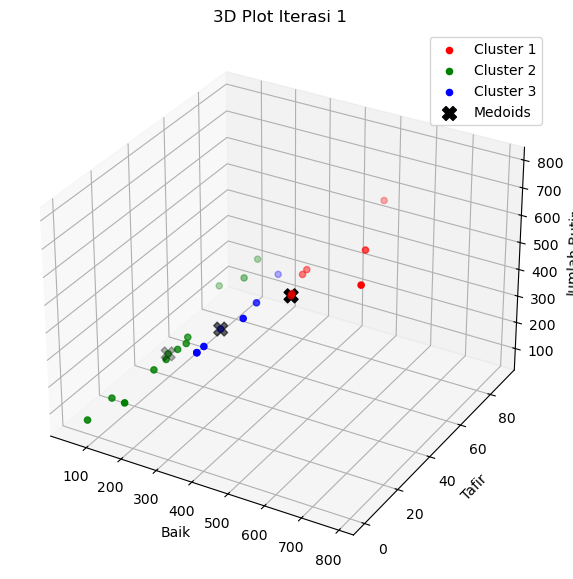


Final Results with Distances (Iterasi 1):
       No. Serbuk  Baik  Tafir  Jumlah Butir  Cluster  Cluster Iterasi 1  \
0   MA-03138/2019   118     90           207        2                  2   
1   MA-03291/2019   650     41           691        1                  1   
2   BJ-01594/2019   450     50           500        1                  1   
3   BJ-01625/2019    50     80           130        2                  2   
4   MA-03290/2019   305     20           325        3                  3   
5   MA-03248/2019   170     25           195        2                  2   
6   MA-03249/2019   367     30           397        3                  3   
7   MA-03220/2019   178     30           208        2                  2   
8   BJ-01621/2019   160     20           180        2                  2   
9   BJ-01604/2019   322     60           382        3                  3   
10  MA-03195/2019   356     40           396        3                  3   
11  MA-03247/2019   500     30           530 

In [10]:
# Bagian 5: Plot 3D Iterasi 1

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data untuk Iterasi 1
data_iter1 = df[['Baik', 'Tafir', 'Jumlah Butir']].values
clusters_iter1 = labels_iter1

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Warna untuk kluster
colors = ['r', 'g', 'b']

# Plotkan titik data dengan warna sesuai kluster
for i in range(3):  # Asumsi ada 3 kluster
    cluster_data = data_iter1[clusters_iter1 == i]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], c=colors[i], label=f'Cluster {i + 1}')

# Plotkan medoid
ax.scatter(medoids_iter1[:, 0], medoids_iter1[:, 1], medoids_iter1[:, 2], c='k', marker='X', s=100, label='Medoids',
           edgecolor='k')

# Label dan legenda
ax.set_xlabel('Baik')
ax.set_ylabel('Tafir')
ax.set_zlabel('Jumlah Butir')
ax.set_title('3D Plot Iterasi 1')
ax.legend()

plt.show()

# Menampilkan DataFrame Iterasi 1

# Tambahkan hasil klasterisasi ke DataFrame untuk Iterasi 1
df['Cluster Iterasi 1'] = clusters_iter1 + 1  # Tambahkan 1 agar cluster dimulai dari 1

# Hitung jarak ke setiap medoid untuk tabel akhir Iterasi 1
distances_iter1 = np.array([[euclidean_distance(point, medoid) for medoid in medoids_iter1] for point in
                            df[['Baik', 'Tafir', 'Jumlah Butir']].values])
df_iter1_final = pd.DataFrame(distances_iter1, columns=[f'Jarak ke Cluster {i + 1}' for i in range(len(medoids_iter1))])
df_iter1_final = pd.concat([df, df_iter1_final], axis=1)

print("\nFinal Results with Distances (Iterasi 1):")
print(df_iter1_final)
